In [1]:
def ThreeDiagonalSolver(A, b):
    y = 0.0
    if len(A) == 0 or len(A) != len(b):
        print("null matrix")
        return []
    n = len(b)
    a = [0.0] * n
    B = [0.0] * n
    y = A[0][0]
    a[0] = - A[0][1]/y
    B[0] = b[0]/y
    for i in range(1, n-1):
        y = A[i][i] + A[i][i-1]*a[i-1]
        a[i] = -A[i][i+1]/y
        B[i] = (b[i]-A[i][i-1]*B[i-1])/y
    res = [0.0] * n
    res[n-1] = (b[n-1]-A[n-1][n-2]*B[n-2])/(A[n-1][n-1]+A[n-1][n-2]*a[n-2])
    for i in range(n-2, -1, -1):
        res[i]= a[i]*res[i+1]+B[i]
    return res


In [2]:
A = [[2, -1, 0],  
      [5, 4, 2],  
      [0, 1, -3]] 
b = [3,6,2]
ThreeDiagonalSolver(A,b)

[1.4883720930232558, -0.023255813953488358, -0.6744186046511629]

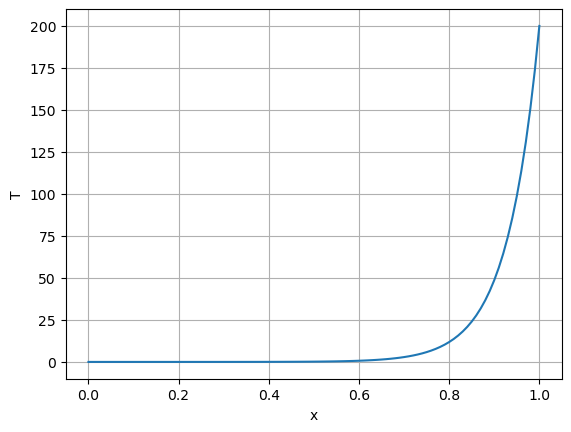

In [1]:
import numpy as np

T_0 = 0 # температура на левой границе
T_L = 200 # температура на правой границе
k = 0.5 # коэффициент теплопроводности
L = 1 # длина стержня
N = 100 # количество узлов на стержне

dx = L/N
x = np.linspace(0, L, N+1) # сетка узлов

dt = 0.01 # шаг по времени
T = np.zeros(N+1) # начальное распределение температуры
T[0] = T_0
T[N] = T_L

#Применим метод прогонки:

A = k/dx**2
B = 1/dt + 2*k/dx**2
C = k/dx**2

a = np.zeros(N+1)
b = np.zeros(N+1)
c = np.zeros(N+1)
d = np.zeros(N+1)

for i in range(1, N):
    a[i] = -A
    b[i] = B
    c[i] = -C
    d[i] = T[i]/dt

#ГУ смешанного типа
a[0] = 0
b[0] = 1
d[0] = T_0

c[N] = 0
b[N] = 1
d[N] = T_L

#прямой ход
for i in range(1, N+1):
    m = a[i]/b[i-1]
    b[i] = b[i] - m*c[i-1]
    d[i] = d[i] - m*d[i-1]

#обратный ход
T[-1] = d[-1]/b[-1]

for i in range(N-1, -1, -1):
    T[i] = (d[i] - c[i]*T[i+1])/b[i]

#Осталось только визуализировать полученное распределение температуры:

import matplotlib.pyplot as plt

plt.plot(x, T)
plt.xlabel('x')
plt.ylabel('T')
plt.grid()
plt.show()